<a href="https://colab.research.google.com/github/krithikp2100/ai-ml/blob/main/Part_2__Building_and_Evaluating_a_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="#de3023"><h1><b>🚨 REMINDER: MAKE A COPY OF THIS NOTEBOOK, DO NOT EDIT 🚨</b></h1></font>

<h2>Computer Vision (CV) - Day 2</h2>

<p style="font-size: 16px;">
Welcome to your second notebook, designed to take your CV skills to the next level. In this notebook, you’ll deepen your understanding of essential concepts, master the remaining steps for cleaning and formatting your dataset for machine learning, and ultimately build your very first model. Let’s get started on this exciting next chapter of your journey!
</p>


# PART I: Welcome to your project!

<img src="https://www.picpedia.org/chalkboard/images/welcome.jpg" width=300>

In [ ]:
# @title Import Packages (might take a couple minutes)

import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import cv2
from IPython import display
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from tensorflow.image import resize_with_pad, ResizeMethod
from sklearn.model_selection import train_test_split
from PIL import Image
import requests
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

def ProjectDescription(text, description_url, image_url):
  display(Markdown(f"[{text}]({description_url})"))
  response = requests.get(image_url, stream=True)
  img = Image.open(response.raw)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [ ]:
# @title Project Selection
project = "Game of Signs" # @param ["Safeguarding Bee Health and Ecosystems", "Towards Precision Medicine in Colorectal Cancer", "Bean Plant Disease Diagnosis in Rural Uganda", "Malaria Detection", "Game of Signs"]

# Load dataset from tensorflow databank

if project == "Bean Plant Disease Diagnosis in Rural Uganda": # GOOD TO GO!
  ProjectDescription(
      project,
      "https://docs.google.com/document/d/19AcNUO-9F4E9Jtc4bvFslGhyuM5pLxjCqKYV3rUaiCc/edit?usp=sharing",
      "https://storage.googleapis.com/tfds-data/visualization/fig/beans-0.1.0.png")
  data,  info = tfds.load('beans', split='train[:1024]', as_supervised=True, with_info=True)
  feature_dict = info.features['label'].names
  images = np.array([resize_with_pad(image, 128, 128, antialias=True) for image,_ in data]).astype(int)
  labels = [feature_dict[int(label)] for image,label in data]


if project == "Malaria Detection": # GOOD TO GO!
  ProjectDescription(
      project,
      "https://docs.google.com/document/d/1u_iX2oDrEZ1clhFefpP3V8uwAjf7EUV4G6kq_3JDcVY/edit?usp=sharing",
      "https://storage.googleapis.com/tfds-data/visualization/fig/malaria-1.0.0.png")
  data,  info = tfds.load('malaria', split='train[:1024]', as_supervised=True, with_info=True)
  images = np.array([resize_with_pad(image, 256, 256, antialias=True) for image,_ in data]).astype(np.uint8)
  labels = ['malaria' if label==1 else 'healthy' for image,label in data]

if project == "Towards Precision Medicine in Colorectal Cancer": # GOOD TO GO
  ProjectDescription(
      project,
      "https://docs.google.com/document/d/1u_iX2oDrEZ1clhFefpP3V8uwAjf7EUV4G6kq_3JDcVY/edit?usp=sharing",
      "https://storage.googleapis.com/tfds-data/visualization/fig/malaria-1.0.0.png")
  data,  info = tfds.load('colorectal_histology', split='train[:1024]', as_supervised=True, with_info=True)
  feature_dict = info.features['label'].names
  images = np.array([image for image,label in data]).astype(int)
  labels = [feature_dict[int(label)] for image,label in data]


if project == "Safeguarding Bee Health and Ecosystems": ## GOOD TO GO!
  ProjectDescription(
      project,
      "https://docs.google.com/document/d/1PUB_JuYHi6zyHsWAhkIb7D7ExeB1EfI09arc6Ad1bUY/edit#heading=h.7cj4vhfagdxo",
      "https://storage.googleapis.com/tfds-data/visualization/fig/bee_dataset-bee_dataset_300-1.0.0.png")
  data,  info = tfds.load('bee_dataset', split='train[:3200]', as_supervised=True, with_info=True)
  data = [(image, label) for image,label in data if label['wasps_output']==0]
  data1 = [(image, label) for image,label in data if label['varroa_output']==0][:500]
  data2 = [(image, label) for image,label in data if label['varroa_output']==1][:500]
  data = data1 + data2
  images = np.array([image for image, _ in data]).astype(int)
  labels = ['diseased' if label['varroa_output'] else 'healthy' for image,label in data]

if project == "Game of Signs":
  data, info = tfds.load('rock_paper_scissors', split='train[:1024]', as_supervised=True, with_info=True)
  feature_dict = info.features['label'].names
  images = np.array([image for image,label in data]).astype(int)
  labels = [feature_dict[int(label)] for image,label in data]


images = [image.astype(np.uint8) for image in images]

grayscale_images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]

resized_images = [cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA) for image in images]

normalized_images = [image / 255.0 for image in images]

# Convert to np arrays
grayscale_images = np.array(grayscale_images)
resized_images = np.array(resized_images)
normalized_images = np.array(normalized_images)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.HE8OAY_3.0.0/rock_paper_scissors-train.tfre…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.HE8OAY_3.0.0/rock_paper_scissors-test.tfrec…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


# PART II: Cleaning your data


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ-bETbdnMY2yF6PSgbKG_Q9Fx_U8fJ4sPTxtAzHtjRCj-XeenAc0rc-oBy5yOS-DUDVTI&usqp=CAU" height=200>


## 🔢 Convert to numerical values


We will be building a ***neural network *** to classify our data. Remember that behind the scenes, machine learning models are just performing a bunch of arithmetic to output a (numerical) prediction/label from a set of (numerical inputs/features). In order to train our neural network and later make predictions on our data, we will need to convert our features & labels into numerical values.

Since image data is composed of matrixes of numbers, our data is already in pretty good format here.


However, we do need to make sure our labels are appropriate for the output of a final layer of a neural network. Instead of a single number, we would like each of our labels to be a vector that corresponds to the probability that an image is of each of the N categories in your given dataset.

Note: Since we truly know the category of each image, our probabilities will always be 1 and 0. Here are a couple examples of how we want to transform our labels.
```
category 0 -> [1, 0, 0, ...]
category 1 -> [0, 1, 0, ...]
category 2 -> [0, 0, 1, ...]
...
```

## Exercise 2A

Convert your data's labels (```labels```) into a one-hot encoded vector (```labels_ohe```), as shown in the example above.  Hint: You can use the pandas function [```pd.get_dummies()```](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). Sometimes a one-hot-encoded version of a variable is called a "dummy
variable".


⭐ **BONUS (difficult)** ⭐ Try to one-hot encode your labels *without* using the ```get_dummies``` function!

In [ ]:
labels_ohe = [pd.get_dummies(labels)] #### YOUR CODE HERE
print("label #1:", labels[0])
print("label #1 converted to OHE:", labels_ohe[0])

label #1: scissors
label #1 converted to OHE:       paper   rock  scissors
0     False  False      True
1     False  False      True
2     False   True     False
3      True  False     False
4     False   True     False
...     ...    ...       ...
1019  False   True     False
1020  False   True     False
1021  False   True     False
1022  False   True     False
1023   True  False     False

[1024 rows x 3 columns]


In [ ]:
#@title Example Solution
labels_ohe = pd.get_dummies(labels) # Using the get_dummies() function to one-hot encode your labels.

# Bonus: without using the get dummies function
possible_labels = list(set(labels))
label_dict = {possible_labels[i]:i for i in range(len(possible_labels))}
labels_ohe = np.array([[0 for _ in possible_labels] for _ in labels])
for i,label in enumerate(labels):
  labels_ohe[i][label_dict[label]] = 1

print("label #1:", labels[0])
print("label #1 converted to OHE:", labels_ohe[0])

label #1: scissors
label #1 converted to OHE: [1 0 0]


## 👆 Selecting features & labels

## Exercise 2B

Select your features (X) and labels (y). Will you use the ```images``` variable as your features or label? How about ```labels_ohe```?





In [ ]:
X = normalized_images
y = labels_ohe

In [ ]:
#@title Example Solution
X = normalized_images
y = labels_ohe

## 🍕 Train test split

<img src="https://live.staticflickr.com/662/33139740912_1f4120f5e6_b.jpg" height=200>

Split up your features and labels into a training and testing dataset. Hint: you can use the function ```train_test_split()```.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y) ### YOUR CODE HERE

print('shape of X_train:', X_train.shape)
print('shape of y_train:', y_train.shape)
print('shape of X_test:', X_test.shape)
print('shape of y_test:', y_test.shape)

shape of X_train: (768, 300, 300, 3)
shape of y_train: (768, 3)
shape of X_test: (256, 300, 300, 3)
shape of y_test: (256, 3)


In [ ]:
#@title Example Solution
X = np.expand_dims(X, axis=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y)
print('shape of X_train:', X_train.shape)
print('shape of y_train:', y_train.shape)
print('shape of X_test:', X_test.shape)
print('shape of y_test:', y_test.shape)

shape of X_train: (768, 300, 300, 3, 1, 1)
shape of y_train: (768, 3)
shape of X_test: (256, 300, 300, 3, 1, 1)
shape of y_test: (256, 3)


# PART III: Training a model

<img src="https://images.squarespace-cdn.com/content/v1/51b3dc8ee4b051b96ceb10de/1452202386372-MNHRZBZ0CUX6GPWS9JWX/image-asset.jpeg" height=200>


We can use keras to construct, train, and evaluate a convolution neural network on your dataset!


## 🚧 Constructing Your Model



<img src="https://assets.zilliz.com/The_Architecture_of_Convolutional_Neural_Networks_8263469ad1.png" width=600>







## 🏁 Initialize your model

We will use a ```Sequential()``` model and add layer by layer. Each convolutional, activation, pooling layer can be added ad a separate layer. We can also add a special layer called a ***dropout*** layer, which will randomly set one of its inputs to 0 with a given frequency. This can help mitigate overfitting in your CNNs!

### Exercise 3A

Initialize your model, using the ```Sequential()``` tensorflow class. Name your model ```cnn_model```.

In [ ]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Conv3D, Flatten


c_c_c = Sequential()

### YOUR CODE HERE ###

In [ ]:
#@title Example Solution
# Import the relevant tensor flow functions and classes
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Conv3D, Flatten

cnn_model = Sequential()

## 🔌 Input layer

Next, we will add layer by layer to your model.

For the first layer, we will simply add an input layer, the layer that will take in each of your images pixels.


Below is an example of an **input** layer that takes in a 64x64 pixel image, with 3 color channels and adds it to the model ```model``` (your may have named your model something different).

```
model.add(keras.Input(shape=(64,64, 3))
```

#### Exercise 3B

Add an input layer to your model. Make sure you use the appropriate dimensions for your image size.  If your model won't train later on, you may need to go back and debug the input layer size here.

⭐ Bonus: Explain to your partner the purpose of the input layer. ⭐

In [ ]:
c_c_c.add(Input(shape=(224,224,3)))


In [ ]:
#@title Example Solution
cnn_model.add(Input(shape=X_train.shape[1:]))


## 🍿 Convolutional Layers


Next, we will be adding the layers that will be the bulk of these models. Remember, that convolutions use **kernels** to pick out criticial features from images. Because the model will learn the weights of each kernel during training, you do not need to specify the kernel weights but you do need to specify the kernel size, the number of kernels per layer, the activation function that each kernel will use to aggregate its values, and the pooling type for aggregating pixel values afterwards. Optionally, you can specify ```padding=same``` so that the image retains its same shape as it gets passed through each kernel.

Here is an exmaple of:

Two sets of **convolutions**, one consisting of:
- A convolutional layer with 16 3x3 kernels, and a 'softmax' activation function
- A maxpooling function using a 2x2 pool size


The other consisting of:
- A convolutional layer with 8 5x5 kernels
- A maxpooling function using a 3x3 max pool size
- A 'sigmoid' activation function

For both sets of convolutions we set ```padding=same``` so that the image retains its shape as it goes through the convolutions.


```
model.add(Conv2D(16,(3,3), activation='softmax', padding="same"))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(8,(5,5), activation='sigmoid', padding="same"))
model.add(MaxPooling2D((3, 3)))
```




### Exercise 3C

Add **5** sets of **convolutions** to your model, each consisting of:
- A convolutional layer with 3x3 kernels. **Alternate between 16 convolutions and 32 convolutions per layer.**
- A 'relu' activation function
- A maxpooling function using a 2x2 pool size
- Set ```padding="same"``` to conserve image size throughout the layers.


⭐ **Bonus: Explain to your partner the purpose of a convolution layer. Explain the purpose of max pooling.** ⭐



In [ ]:
# YOUR CODE HERE ###
c_c_c = Sequential()
c_c_c.add(Input(shape=(300,300,3)))


# First layer - we've helped you out with this one - uncomment it out.
c_c_c.add(Conv2D(16,(3,3), activation='relu', padding="same"))
c_c_c.add(MaxPooling2D((2, 2)))


# Second layer
### YOUR CODE HERE ###
c_c_c.add(Conv2D(32,(3,3), activation='relu', padding="same"))
c_c_c.add(MaxPooling2D((2, 2)))

# Third layer
### YOUR CODE HERE ###
c_c_c.add(Conv2D(32,(3,3), activation='relu', padding="same"))
c_c_c.add(MaxPooling2D((2, 2)))

# Fourth layer
### YOUR CODE HERE ###
c_c_c.add(Conv2D(16,(3,3), activation='relu', padding="same"))
c_c_c.add(MaxPooling2D((2, 2)))


# Fifth layer
### YOUR CODE HERE ###
c_c_c.add(Conv2D(32,(3,3), activation='relu', padding="same"))
c_c_c.add(MaxPooling2D((2, 2)))



In [ ]:
#@title Example Solution

# First layer
cnn_model.add(Conv2D(32,(3,3), activation='relu', padding="same"))
cnn_model.add(MaxPooling2D((2, 2)))


# Second layer
cnn_model.add(Conv2D(16,(3,3), activation='relu', padding="same"))
cnn_model.add(MaxPooling2D((2, 2)))

# Third layer
cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
cnn_model.add(MaxPooling2D((2, 2)))


# Fourth layer
cnn_model.add(Conv2D(16,(3,3), activation='relu', padding="same"))
cnn_model.add(MaxPooling2D((2, 2)))

# Fifth layer
cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
cnn_model.add(MaxPooling2D((2, 2)))

NameError: name 'cnn_model' is not defined

## 🔉 Fully-connected and output layer

Finally, we will flatten the outputs of the last convolution into a single array of features, and pass those features through a regular/fully connected (sometimes also called "dense") neural network.  The final layer of this neural network should have the same number of features as your dataset has labels.

Here is an example of a set of layers that
- flattens the outputs of your last convolution into a 1-dimensional array
- then feeds this array through a network with a single hidden layer of 40 nodes (with a linear activation function)
- ...and a final output layer (with a soft-max activation function).

```
model.add(Flatten()) # The "flattening" layer
model.add(Dense(40)) # The hidden layer of your NN
model.add(Dense(20), activation='softmax') # The output layer


### Exercise 3D

Add a fully connected neural network to your layer consisting of:

- A flattening layer, to transform your 3D tensor/matrix into a 1-dimensional array.

- A **dense (fully connected)** layer with 64 nodes,  and a 'relu' activation function

- A **final output layer** that uses a softmax activation function to predict the scores for each of the different categories in your dataset.


⭐ Bonus: Explain to your partner the purpose of the fully connected layer. ⭐

In [ ]:
### YOUR CODE HERE ###



# Flattening layer
c_c_c.add(Flatten()) # The "flattening" layer

# Dense layer with 64 nodes, and relu activation function.
c_c_c.add(Dense(64, activation='relu')) # The hidden layer of your NN

# Final output layer that uses a softmax activation function.
c_c_c.add(Dense(len(y[0]), activation='softmax')) # The output layer


In [ ]:
#@title Example Solution

# Flattening layer
cnn_model.add(Flatten())

# Hidden (dense) layer with 64 nodes, and relu activation function.
cnn_model.add(Dense(64, activation='relu'))

# Final output layer that uses a softmax activation function.
cnn_model.add(Dense(len(labels_ohe[0]), activation='softmax'))

## ⏭ Compiling your model


Finally, we compile the model, specifying the loss function and optimization methods we wish to use, and any metrics we want the model to keep track of as it trains. Categorical cross-entropy is a good loss to use for multi-class classification tasks. below, we additionally specify that we wish to keep track of the cross entropy loss, and the accuracy while we train by passing these arguments as ```metrics```.

After compiling the model you can use the ```.summary()``` function to make sure the model's structure and output sizes of each layer are what you expect.


```
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_crossentropy', 'accuracy'])
model.summary()
```

**Debugging note**: Unfortunately, for many coding mistakes you may have made during model design, you won't see any errors from tensorflow until you compile or train your model.  If you see errors you the next two steps, you may have to go back and debug the code for your input, convolutional, or fully connected layers.




### Exercise 3E

Compile your model using a ```categorical_crossentropy``` loss and the ```rmsprop``` optimzer. Track at the very least, ```accuracy``` and ```cross_entropy```.

Additionally, look at the summary of your model and determine how many weights (parameters) the model will be learning as it trains.


⭐ **BONUS** ⭐: Look through the possible [metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) you can track. Find another appropriate and relevant metric to your classification problem, understand what it means, and add it to the list of metrics you wish to track.





💻 Compile and check out your model.



In [ ]:
metrics_to_track = ['categorical_crossentropy', 'accuracy'] # Fill in with a list of metrics here

c_c_c.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=metrics_to_track)
c_c_c.summary()



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 300, 300, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 150, 150, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 18, 18, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 18, 18, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2592)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       165,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 189,747 (741.20 KB)

 Trainable params: 189,747 (741.20 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#@title Example Solution
metrics_to_track = ['categorical_crossentropy', 'accuracy']
cnn_model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=metrics_to_track)
cnn_model.summary()

The "trainable params" field in your output is the number of weights that your model will learn! Therefore, please be patient with your model as it trains 🙂</font>

## 🏃 Training your model

### Exercise 3F

Now we can train our model, just like we did in previous parts of the course. We can keep track of how our model does as it trains over many epochs by setting aside some validation data. In some cases, you may want to set aside both a validation dataset and a testing dataset (so that you can keep the testing set hidden away from the model developers until the bitter end).

**Bonus question**: why might you want to keep the testing set tucked away until you are done with model development?




Train your model using the training data, and use the test data to keep track of your testing metrics over each epoch. (Normally, we should use a separate dataset for deciding best epoch, but we won't be focusing too much on hyperparameter tuning for these notebooks). Train for 20 epochs using 64 images per batch.



**While your model trains, consider the questions in Exercise 3C**

In [ ]:
# Fit your model using the .fit() function.
### YOUR CODE HERE ###
c_c_c.fit(X_train,y_train,
          validation_data = (X_test,y_test), epochs = 2, batch_size = 64)


Epoch 1/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 87s 7s/step - accuracy: 0.3631 - categorical_crossentropy: 1.1087 - loss: 1.1087 - val_accuracy: 0.3516 - val_categorical_crossentropy: 1.0906 - val_loss: 1.0906
Epoch 2/2
12/12 ━━━━━━━━━━━━━━━━━━━━ 130s 6s/step - accuracy: 0.4139 - categorical_crossentropy: 1.0792 - loss: 1.0792 - val_accuracy: 0.6719 - val_categorical_crossentropy: 0.8302 - val_loss: 0.8302


In [ ]:
#@title Example Solution
# Fit your model using the .fit() function.
### YOUR CODE HERE ###
cnn_model.fit(X_train, y_train,
              validation_data=(X_test, y_test), epochs=3, batch_size=64)


Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 57s 5s/step - accuracy: 0.3827 - categorical_crossentropy: 1.0951 - loss: 1.0951 - val_accuracy: 0.3555 - val_categorical_crossentropy: 1.0942 - val_loss: 1.0942
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.3920 - categorical_crossentropy: 1.0796 - loss: 1.0796 - val_accuracy: 0.3906 - val_categorical_crossentropy: 1.0144 - val_loss: 1.0144
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 86s 4s/step - accuracy: 0.5513 - categorical_crossentropy: 0.9768 - loss: 0.9768 - val_accuracy: 0.7656 - val_categorical_crossentropy: 0.7286 - val_loss: 0.7286


## Exercise 3G

While your model trains, think about the following questions

(1) As the number of epochs your model trains for increases, would you expect the loss on your training data to go up or down?

(2) How about the accuracy on your training data?

(3) How about the accuracy of your validation data?

(4) Which epoch gives the highest test accuracy or cross entropy?



In [ ]:
#@title

reflection = "" # @param {type:"string"}

## Exercise 3H

Retrain your model one final time, using the optimal number of epochs. Important: Be sure to recompile your model beforehand; otherwise, training will simply resume from the previous checkpoint.

Take some time to experiment with different variations of the data, such as grayscale images, resized images, or normalized images, from yesterday's notebook. To make things more convenient, we’ve preloaded `grayscale_images`, `resized_images`, and `normalized_images`

 for you. If you'd like to try combining all three preprocessing techniques, feel free to do so before training your next model!

What did you notice about your accuracy as you used the different preprocessed images?



In [ ]:
#@title

reflection = "" # @param {type:"string"}

# Part IV: Evaluating Your Model

Now, let's evaluate the model.

Recall that the model will take an input image (matrix of numbers) and output a score for each category in your dataset. This means that the output will be a vector that is the same length as the number of categories in your dataset.

Here is a function that takes in such a vector and outputs the category name, the numbe that corresponded to it, and the probability.


Run the code to see the model predictions on the first image in the test dataset.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
scores:  [0.15842368 0.08907302 0.7525033 ]
model prediction: paper (0.75 probability)
true label: paper (1.00 probability)


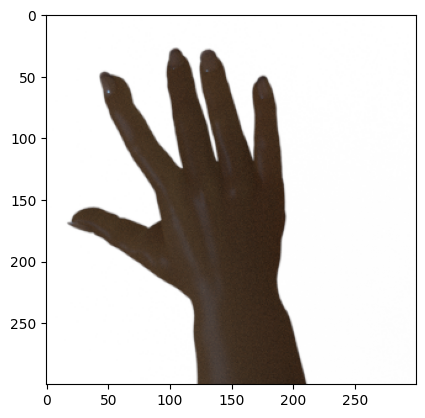

In [ ]:
one_hot_encoding_to_label_dict = {np.argmax(ohe):label for ohe, label in zip(labels_ohe, labels)}
def ScoreVectorToPredictions(prob_vector):
  class_num = np.argmax(prob_vector) # Find which element in the vector has the highest score.
  class_name = one_hot_encoding_to_label_dict[class_num] # Figure out the label that corresponds to this element.
  return class_name, max(prob_vector) # Return the label as well as the probabilty that the model assigned to this prediction.

# Predict on the first three images from the test dataset
# (you could predict on all of the samples, just doing 3 for speed)
scores = c_c_c.predict(X_test[:3])
print('scores: ', scores[0])

# Use the score_vector_to_predcitions vector to get the model predictions, as well as the original label.
class_name, prob = ScoreVectorToPredictions(scores[0]) # Get the model predictions and associated probabilitie
true_label, true_prob = ScoreVectorToPredictions(y_test[0]) # Get the true labels (we know the "true" probabilities - 100%)

print('model prediction: %s (%.02f probability)' % (class_name, prob)) # Here's another fun way to combine strings/variable values.
print('true label: %s (%.02f probability)' % (true_label, true_prob)) # Here's another fun way to combine strings/variable values.

# Let's take a look at the image as well.
plt.figure()
plt.imshow(X_test[0], cmap='gray') # Looking at the first "color channel" (even though we are only using one.)
plt.show()

### Exercise 4A

Write a for loop that prints the first 5 images in your dataset, along with the models prediction.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
test image # 0
model prediction: paper (0.75 probability)
true label: paper (1.00 probability)


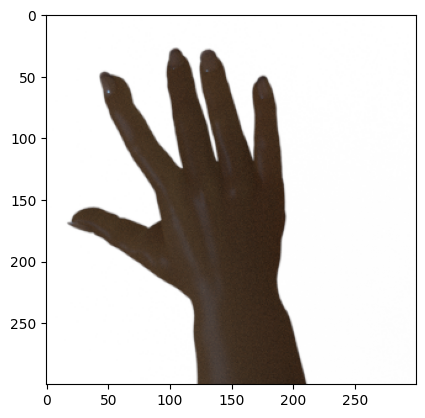

test image # 1
model prediction: paper (0.75 probability)
true label: paper (1.00 probability)


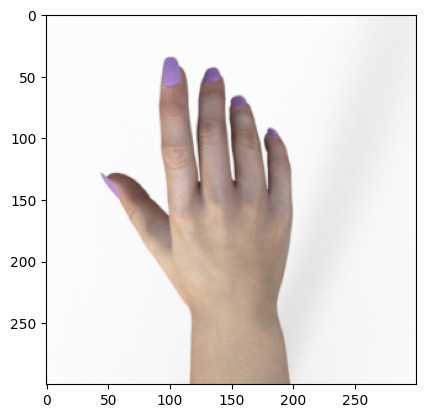

test image # 2
model prediction: paper (0.75 probability)
true label: paper (1.00 probability)


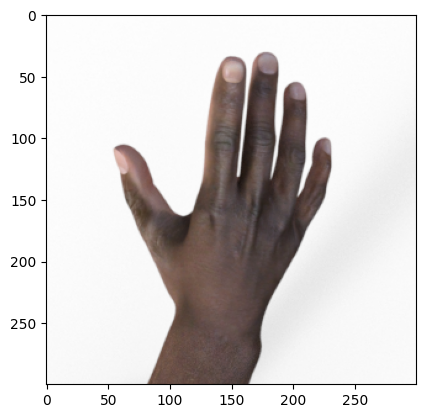

test image # 3
model prediction: paper (0.75 probability)
true label: paper (1.00 probability)


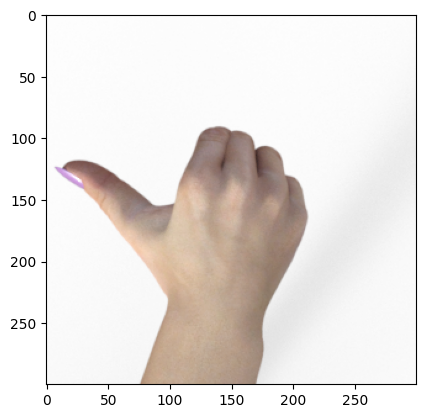

test image # 4
model prediction: paper (0.75 probability)
true label: paper (1.00 probability)


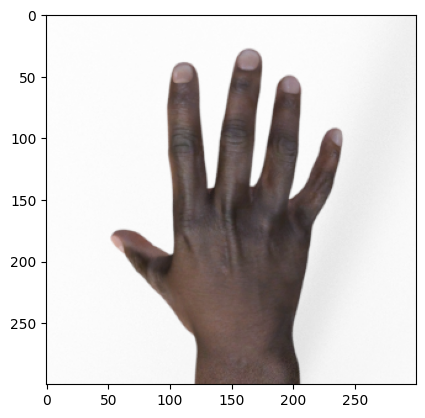

In [ ]:
# Use the .predict() function to get the predictions on your testing dataset
# You can subset to the first 5 images if you'd like.
scores = c_c_c.predict(X_test[:5]) ## YOUR CODE HERE ###

# For each image, print the model prediction, it's probability, and the actual label
for image_i in range(5):
  print('test image # %i' % image_i)

  class_name, prob = ScoreVectorToPredictions(scores[0]) # Get the model predictions and associated probabilitie
  true_label, true_prob = ScoreVectorToPredictions(y_test[0]) # Get the true labels (we know the "true" probabilities - 100%)

  print('model prediction: %s (%.02f probability)' % (class_name, prob)) # Here's another fun way to combine strings/variable values.
  print('true label: %s (%.02f probability)' % (true_label, true_prob)) # Here's another fun way to combine strings/variable values.

  # Let's take a look at the image as well.
  plt.figure()
  plt.imshow(X_test[image_i], cmap='gray') # Looking at the first "color channel" (even though we are only using one.)
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
test image # 0
model prediction: paper (0.6 probability)
true label: paper (1.00 probability)


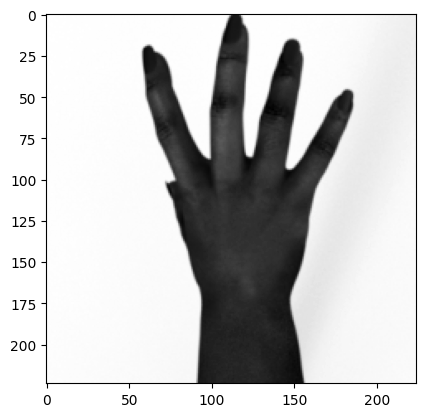

----------
test image # 1
model prediction: scissors (0.5 probability)
true label: scissors (1.00 probability)


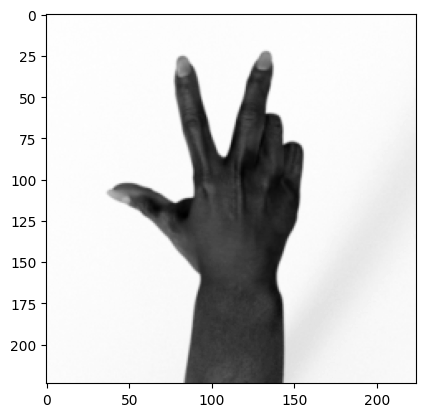

----------
test image # 2
model prediction: paper (0.7 probability)
true label: paper (1.00 probability)


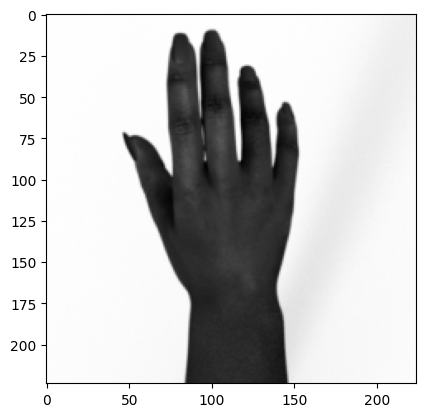

----------
test image # 3
model prediction: scissors (0.5 probability)
true label: paper (1.00 probability)


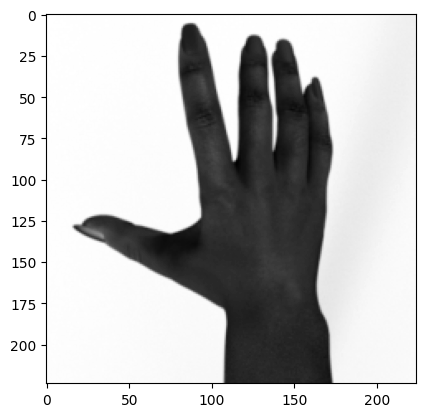

----------
test image # 4
model prediction: paper (0.7 probability)
true label: paper (1.00 probability)


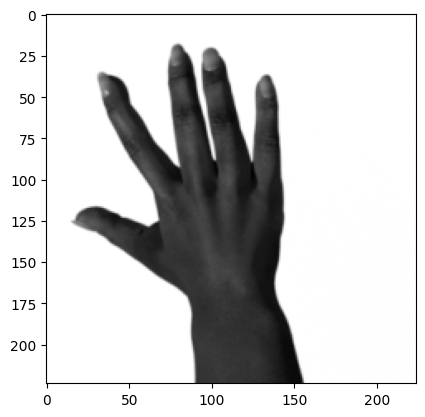

----------


In [ ]:
#@title Example Solution
# Use the .predict() function to get the predictions on your testing dataset
# You can subset to the first 5 images if you'd like.
scores = cnn_model.predict(X_test[:5])

# For each image, print the model prediction, it's probability, and the actual label
for image_i in range(5):
  print('test image # %i' % image_i)

  # Get the model prediction and probability, print it
  class_name, prob = ScoreVectorToPredictions(scores[image_i])
  print('model prediction: %s (%.01f probability)' % (class_name, prob)) # Here's another fun way to combine strings/variable values.

  # Get the actual label of the image, print it
  true_label, true_prob = ScoreVectorToPredictions(y_test[image_i]) # Get the true labels (we know the "true" probabilities - 100%)
  print('true label: %s (%.02f probability)' % (true_label, true_prob)) # Here's another fun way to combine strings/variable values.

  # Display the image
  plt.figure()
  plt.imshow(X_test[image_i], cmap='gray')
  plt.show()

  print("-"*10)


### BONUS ⭐

Look through some additional images. Use a variation of the code above.

Can you find any patterns for what types of images your model did well/poorly on?

In [ ]:
### YOUR CODE HERE ###

In [ ]:
# @title
_1_ = "" # @param {type:"string"}
_2_ = "" # @param {type:"string"}
_2_ = "" # @param {type:"string"}



## Evaluation Metrics

Now, we will report. some high level metrics and visualizations to descrbe how your model performed overall on the testing dataset.

Some possible metrics include:
(1) Accuracy of your model
(2) Confusion matrix of your model
(3) Sensitivity & specificty of your model (if you have only 2 classes)


⭐ What other metrics might you be interested in? ⭐


### Exercise 4B


Use your model to classify all of the images in your test dataset. Remember, you will have to convert the scores from the neural network into classes!


Make sure your final output is a list of different (string/categorical) predictions for each sample in your testing dataset.







In [ ]:
# Use your model to make predictions on the testing dataset.
y_pred_ohe = c_c_c.predict(X_test) ### YOUR CODE HERE ###

## We've helped you convert your model outputs into a list of predictions
y_pred_labels = [ScoreVectorToPredictions(y)[0] for y in y_pred_ohe]
print('predicted labels:', y_pred_labels) # The output of this should be a list of categories.

# To help with the next problem, we've also helped you convert your one-hot-encoded test labels back to categories.
y_test_labels = [ScoreVectorToPredictions(y)[0] for y in y_test]
print('actual_labels:', y_test_labels)

8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 863ms/step
predicted labels: ['paper', 'paper', 'scissors', 'scissors', 'scissors', 'scissors', 'scissors', 'rock', 'paper', 'scissors', 'paper', 'scissors', 'rock', 'rock', 'rock', 'scissors', 'scissors', 'paper', 'scissors', 'scissors', 'scissors', 'paper', 'paper', 'scissors', 'scissors', 'paper', 'scissors', 'scissors', 'paper', 'paper', 'paper', 'paper', 'rock', 'paper', 'paper', 'scissors', 'paper', 'rock', 'scissors', 'scissors', 'paper', 'paper', 'paper', 'paper', 'rock', 'scissors', 'paper', 'scissors', 'scissors', 'scissors', 'paper', 'scissors', 'scissors', 'scissors', 'scissors', 'rock', 'scissors', 'paper', 'scissors', 'scissors', 'scissors', 'paper', 'paper', 'scissors', 'scissors', 'scissors', 'paper', 'paper', 'paper', 'paper', 'rock', 'scissors', 'scissors', 'rock', 'scissors', 'scissors', 'paper', 'paper', 'paper', 'scissors', 'paper', 'paper', 'scissors', 'scissors', 'paper', 'paper', 'scissors', 'rock', 'scissors', 'scissors', 'paper', 'p

In [ ]:
# Use your model to make predictions on the testing dataset.
y_pred_ohe = cnn_model.predict(X_test) ### YOUR CODE HERE ###

## We've helped you convert your model outputs into a list of predictions
y_pred_labels = [ScoreVectorToPredictions(y)[0] for y in y_pred_ohe]
print('predicted labels:', y_pred_labels) # The output of this should be a list of categories.

# To help with the next problem, we've also helped you convert your one-hot-encoded test labels back to categories.
y_test_labels = [ScoreVectorToPredictions(y)[0] for y in y_test]
print('actual_labels:', y_test_labels)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 452ms/step
predicted labels: ['paper', 'scissors', 'paper', 'scissors', 'paper', 'scissors', 'rock', 'rock', 'scissors', 'paper', 'scissors', 'paper', 'paper', 'paper', 'paper', 'rock', 'paper', 'scissors', 'paper', 'scissors', 'scissors', 'rock', 'paper', 'rock', 'scissors', 'scissors', 'paper', 'scissors', 'rock', 'paper', 'paper', 'paper', 'scissors', 'rock', 'rock', 'paper', 'rock', 'paper', 'paper', 'scissors', 'rock', 'scissors', 'rock', 'rock', 'paper', 'scissors', 'scissors', 'paper', 'rock', 'paper', 'scissors', 'rock', 'rock', 'rock', 'scissors', 'rock', 'rock', 'rock', 'paper', 'paper', 'scissors', 'paper', 'paper', 'scissors', 'paper', 'scissors', 'rock', 'rock', 'rock', 'scissors', 'paper', 'paper', 'scissors', 'rock', 'paper', 'paper', 'paper', 'rock', 'paper', 'paper', 'rock', 'scissors', 'scissors', 'rock', 'scissors', 'scissors', 'rock', 'rock', 'scissors', 'rock', 'paper', 'paper', 'scissors', 'scissors', 'paper', 'rock', 'rock', 'paper', '

### Exercise 4C

Plot a confusion matrix of your model's performance on the testing data (we've given you a function to help you out!), and compute the overall accuracy of the model.

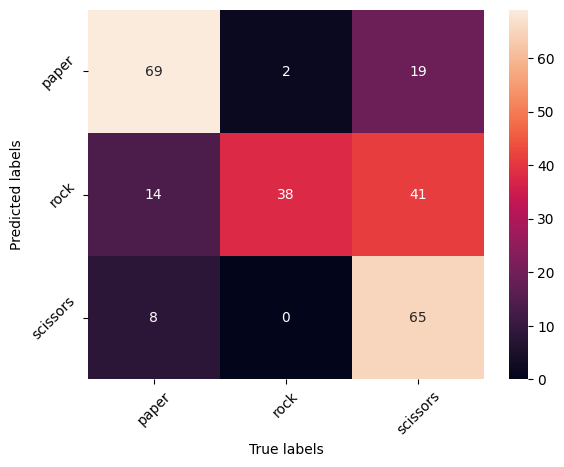

0.671875


In [ ]:
#@title Example Solution

# Here is a function to visualize the confusion matrix.
def ConfusionMatrix(y_true, y_pred):
  sns.heatmap(pd.crosstab(y_true, y_pred), annot=True)
  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.xticks(rotation=45)
  plt.yticks(rotation=45)
  plt.show()

# Here is a function to compute the accuracy of your model
def Accuracy(y_true, y_pred):
  return np.mean([a==b for a,b in zip(y_true, y_pred)])


# Visualize confusion matrix
### YOUR CODE HERE ###
ConfusionMatrix(y_test_labels, y_pred_labels)

# Compute overall accuracy
### YOUR CODE HERE ###
print(Accuracy(y_test_labels, y_pred_labels))

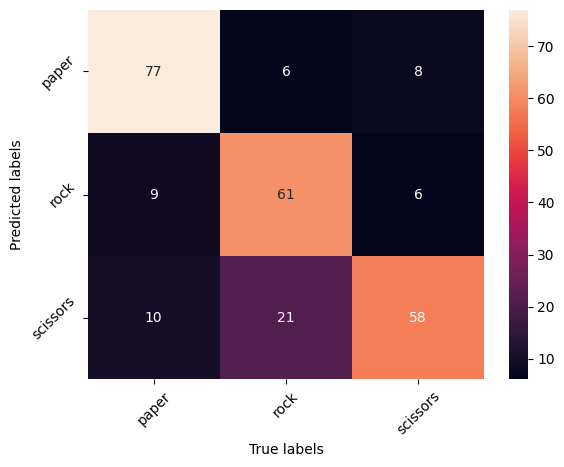




Accuracy: 0.765625


In [ ]:
#@title Example Solution

# Here is a function to visualize the confusion matrix.
def ConfusionMatrix(y_true, y_pred):
  sns.heatmap(pd.crosstab(y_true, y_pred), annot=True, fmt='g')
  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.xticks(rotation=45)
  plt.yticks(rotation=45)
  plt.show()

# Here is a function to compute the accuracy of your model
def Accuracy(y_true, y_pred):
  return np.mean([a==b for a,b in zip(y_true, y_pred)])


# Visualize confusion matrix
ConfusionMatrix(y_test_labels, y_pred_labels)

print("\n\n")

# Compute overall accuracy
print("Accuracy:", Accuracy(y_test_labels, y_pred_labels))

# PART V: Day 2 Homework


1. Explore other hyperparameters to expand your understanding and improve your approach. Collaborate with your mentor and utilize our [Hyperparameter Tuning Task Sheet](https://docs.google.com/document/d/1LyuydIk5DlP4zEaevm5VBJsbcoVyCN-oHW7wpFj2mlg/edit?usp=sharing) to stay organized and on track throughout the process.

2. Return to your project notebook and implement these steps using your own dataset. Remember that variable names and structures may differ, so be prepared to adapt your code as needed.

3. Take time to reflect on your experience. What challenges did you face? What didn’t work, and what worked well? Don’t hesitate to seek guidance from your mentor or attend Open Labs—boilerplate code often requires adjustments for unique datasets! Embrace the challenges; the true beauty of coding lies in solving problems and the immense satisfaction of conquering errors!

# Wrapping Up Day 2



🎉 **Congratulations on Building Your First Machine Learning Model!** 🎉  
Amazing work! You’ve taken a significant step in your journey by creating your very first machine learning model. This is no small feat—it’s the foundation upon which incredible projects are built. 🚀 As you advance your skills and bring your own ideas to life, remember to revisit these notebooks as valuable references to guide your progress.

But why stop here? The world of machine learning is vast, and there’s so much more to explore. Below, you’ll find additional resources and optional enhancements to take your projects to the next level. 🌟

---

### **Expand Your Horizons with Optional Enhancements**

- **Dive Into Advanced Models**  
   Ready to elevate your projects further? Explore advanced CV techniques like Data Augmentation or Transfer Learning to unlock more predictive power, and uncover deeper insights.
   👉 [Advanced Techniques in CV](https://colab.research.google.com/drive/1XWwiQepViwUUI-D6noEOGpFd9POZDrXc?usp=drive_link)

---

### 🌟 **What’s Next?**
- **Experimentation**: Don’t be afraid to try new techniques and push the boundaries of what your model can do.  
- **Iteration**: Refine your skills by iterating on your projects, optimizing performance, and exploring new datasets.  
- **Collaboration**: Share your work with mentors, peers, or in Open Labs to gain insights and fresh perspectives.

Every model you build and every enhancement you implement is a step closer to mastery. Keep learning, keep growing, and keep building—your journey has just begun! 🚀